# Predicting income from independent variables

In [502]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sqlalchemy import create_engine

In [503]:
pd.set_option('display.max_rows', 3000)

In [504]:
# Importing the data into a dataframe

df = pd.read_csv('food_coded.csv')


In [505]:
# setting the dataframe to include the features and target to be worked with

weight_df =  df[['income','cook','employment','exercise','sports','vitamins','weight']]

weight_df


,income,cook,employment,exercise,sports,vitamins,weight
0,5.0,2.0,3.0,1.0,1.0,1,187
1,4.0,3.0,2.0,1.0,1.0,2,155
2,6.0,1.0,3.0,2.0,2.0,1,I'm not answering this.
3,6.0,2.0,3.0,3.0,2.0,1,"Not sure, 240"
4,6.0,1.0,2.0,1.0,1.0,2,190
5,1.0,3.0,3.0,2.0,2.0,2,190
6,4.0,2.0,3.0,1.0,1.0,1,180
7,5.0,3.0,2.0,2.0,2.0,2,137
8,5.0,3.0,2.0,NaN,2.0,2,180
9,4.0,3.0,3.0,1.0,1.0,1,125


In [506]:
# checking which columns have null values 

weight_df.isnull().sum()

income         1
cook           3
employment     9
exercise      13
sports         2
vitamins       0
weight         2
dtype: int64

In [507]:
# checking the data types

weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
income        124 non-null float64
cook          122 non-null float64
employment    116 non-null float64
exercise      112 non-null float64
sports        123 non-null float64
vitamins      125 non-null int64
weight        123 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 6.9+ KB


In [508]:
# checking the percentage of missing values in each column

weight_df_null = weight_df.isnull().sum()*100/weight_df.isnull().count()
weight_df_null.sort_values()


vitamins       0.0
income         0.8
sports         1.6
weight         1.6
cook           2.4
employment     7.2
exercise      10.4
dtype: float64

In [509]:
# formatting the Exercise column

new_exercise_column = pd.DataFrame(weight_df['exercise'].fillna(weight_df['exercise'].mean(),inplace=False))
new_exercise_column = np.round(new_exercise_column, decimals=0)




weight_df = weight_df.drop('exercise', axis=1)
weight_df.insert(1,'exercise',new_exercise_column, True)




In [510]:
weight_df.head()

,income,exercise,cook,employment,sports,vitamins,weight
0,5.0,1.0,2.0,3.0,1.0,1,187
1,4.0,1.0,3.0,2.0,1.0,2,155
2,6.0,2.0,1.0,3.0,2.0,1,I'm not answering this.
3,6.0,3.0,2.0,3.0,2.0,1,"Not sure, 240"
4,6.0,1.0,1.0,2.0,1.0,2,190


In [511]:
# formatting columns 

new_income_column        = pd.DataFrame(weight_df['income'].fillna(weight_df['income'].mean(),inplace=False))
new_cook_column          = pd.DataFrame(weight_df['cook'].fillna(weight_df['cook'].mean(),inplace=False))
new_employment_column    = pd.DataFrame(weight_df['employment'].fillna(weight_df['employment'].mean(),inplace=False))
new_sports_column        = pd.DataFrame(weight_df['sports'].fillna(weight_df['sports'].mean(),inplace=False))


new_income_column = np.round(new_income_column, decimals=0)
new_cook_column  = np.round(new_cook_column, decimals=0)
new_employment_column = np.round(new_employment_column, decimals=0)
new_sports_column = np.round(new_sports_column, decimals=0)


weight_df = weight_df.drop('income', axis=1)
weight_df = weight_df.drop('cook', axis=1)
weight_df = weight_df.drop('employment', axis=1)
weight_df = weight_df.drop('sports', axis=1)


weight_df.insert(0,'income',new_income_column, True)
weight_df.insert(2,'cook',new_cook_column,True )
weight_df.insert(3,'employment',new_employment_column, True)
weight_df.insert(4,'sports',new_sports_column, True)


weight_df.update(weight_df.replace('Not sure, 240',240, inplace=False))
weight_df.update(weight_df.replace('144 lbs',144, inplace=False))

weight_df['weight'] = weight_df['weight'].drop([2], inplace=False)





In [512]:
weight_df.head()

,income,exercise,cook,employment,sports,vitamins,weight
0,5.0,1.0,2.0,3.0,1.0,1,187
1,4.0,1.0,3.0,2.0,1.0,2,155
2,6.0,2.0,1.0,3.0,2.0,1,NaN
3,6.0,3.0,2.0,3.0,2.0,1,240
4,6.0,1.0,1.0,2.0,1.0,2,190


In [513]:
# formatting columns 

new_weight_column = weight_df['weight'].fillna(0)

weight_df['weight'].update(new_weight_column)

weight_df["weight"] = weight_df["weight"].astype(int)

last_updated_weight = weight_df['weight'].replace(0, weight_df['weight'].mean(), inplace=False )

weight_df['weight'].update(last_updated_weight)


In [514]:
# checking the dataframe

weight_df.head(10)

,income,exercise,cook,employment,sports,vitamins,weight
0,5.0,1.0,2.0,3.0,1.0,1,187.000
1,4.0,1.0,3.0,2.0,1.0,2,155.000
2,6.0,2.0,1.0,3.0,2.0,1,155.232
3,6.0,3.0,2.0,3.0,2.0,1,240.000
4,6.0,1.0,1.0,2.0,1.0,2,190.000
5,1.0,2.0,3.0,3.0,2.0,2,190.000
6,4.0,1.0,2.0,3.0,1.0,1,180.000
7,5.0,2.0,3.0,2.0,2.0,2,137.000
8,5.0,2.0,3.0,2.0,2.0,2,180.000
9,4.0,1.0,3.0,3.0,1.0,1,125.000


In [515]:
# checking for null values in the dataframe

weight_df.dropna(inplace=True)
weight_df.isnull().sum()

income        0
exercise      0
cook          0
employment    0
sports        0
vitamins      0
weight        0
dtype: int64

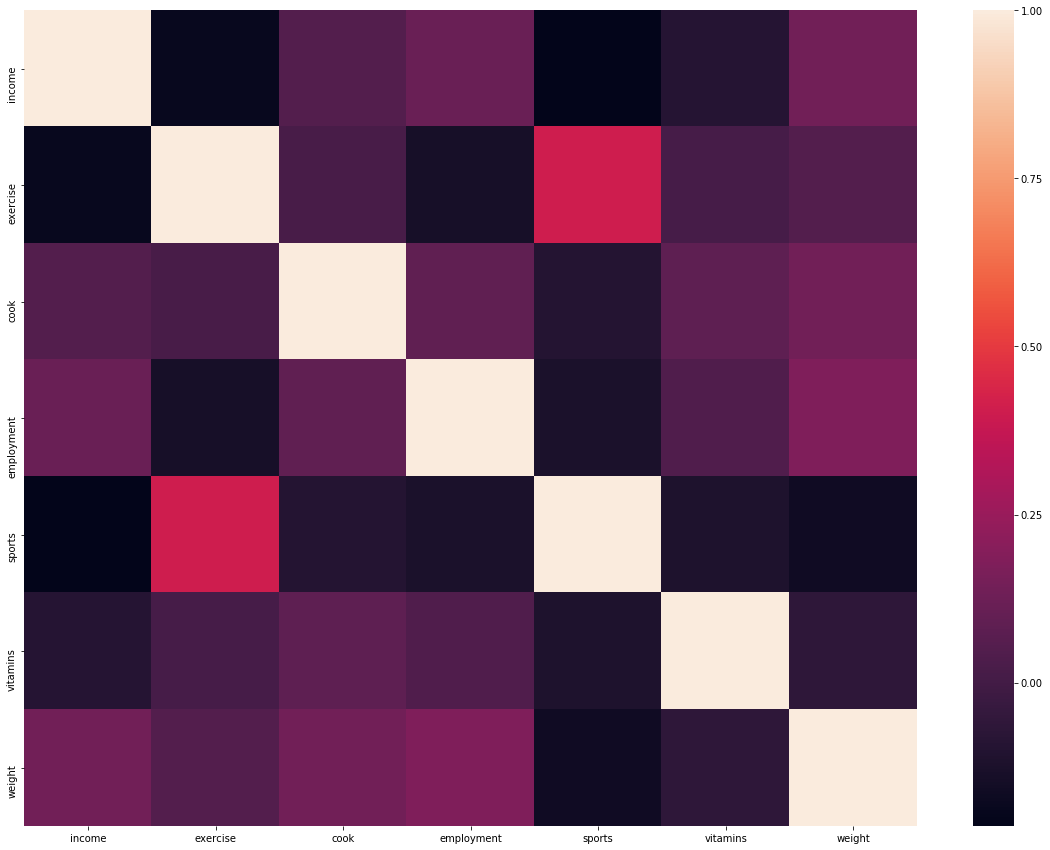

In [516]:
# creating heatmaps to make sure features are independent of one another
# so no bias in the prediction phase
plt.figure(figsize=(20,15))

sns.heatmap(weight_df.corr())
plt.show()

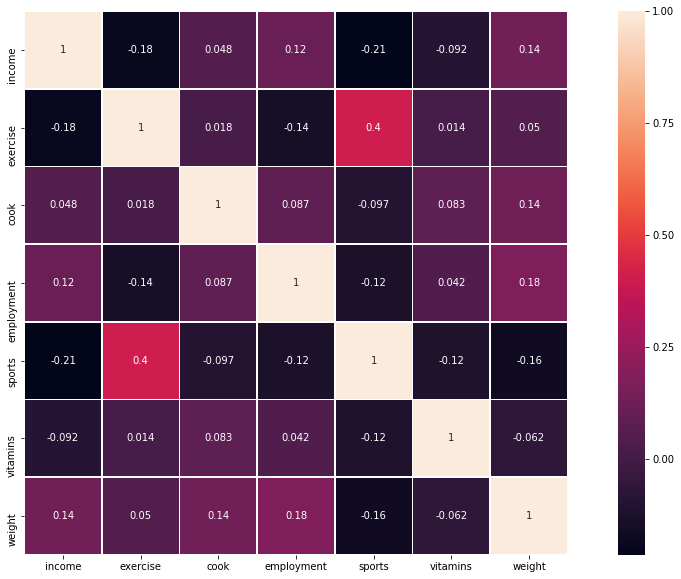

In [517]:
weight_corr = weight_df.corr()

plt.figure(figsize=(18,10))

sns.heatmap(weight_corr,square=True,annot=True,linewidth=.5)
plt.show()

In [518]:
weight_df.astype(int)

,income,exercise,cook,employment,sports,vitamins,weight
0,5,1,2,3,1,1,187
1,4,1,3,2,1,2,155
2,6,2,1,3,2,1,155
3,6,3,2,3,2,1,240
4,6,1,1,2,1,2,190
5,1,2,3,3,2,2,190
6,4,1,2,3,1,1,180
7,5,2,3,2,2,2,137
8,5,2,3,2,2,2,180
9,4,1,3,3,1,1,125


In [519]:
# previewing the explanatory (independent) variables

X = weight_df.iloc[:,1:]
X 

,exercise,cook,employment,sports,vitamins,weight
0,1.0,2.0,3.0,1.0,1,187.000
1,1.0,3.0,2.0,1.0,2,155.000
2,2.0,1.0,3.0,2.0,1,155.232
3,3.0,2.0,3.0,2.0,1,240.000
4,1.0,1.0,2.0,1.0,2,190.000
5,2.0,3.0,3.0,2.0,2,190.000
6,1.0,2.0,3.0,1.0,1,180.000
7,2.0,3.0,2.0,2.0,2,137.000
8,2.0,3.0,2.0,2.0,2,180.000
9,1.0,3.0,3.0,1.0,1,125.000


In [520]:
# previewing the dependent variables

y = weight_df.iloc[:, 0]
y

0      5.0
1      4.0
2      6.0
3      6.0
4      6.0
5      1.0
6      4.0
7      5.0
8      5.0
9      4.0
10     3.0
11     5.0
12     5.0
13     5.0
14     5.0
15     4.0
16     1.0
17     6.0
18     5.0
19     5.0
20     6.0
21     6.0
22     6.0
23     4.0
24     4.0
25     6.0
26     5.0
27     6.0
28     5.0
29     5.0
30     5.0
31     4.0
32     5.0
33     3.0
34     6.0
35     4.0
36     6.0
37     6.0
38     5.0
39     6.0
40     6.0
41     3.0
42     6.0
43     3.0
44     5.0
45     6.0
46     4.0
47     6.0
48     5.0
49     3.0
50     1.0
51     6.0
52     5.0
53     3.0
54     6.0
55     3.0
56     6.0
57     5.0
58     5.0
59     6.0
60     6.0
61     4.0
62     6.0
63     5.0
64     2.0
65     6.0
66     4.0
67     5.0
68     6.0
69     6.0
70     3.0
71     5.0
72     5.0
73     6.0
74     3.0
75     5.0
76     3.0
77     3.0
78     5.0
79     6.0
80     4.0
81     4.0
82     3.0
83     1.0
84     5.0
85     6.0
86     6.0
87     6.0
88     2.0
89     3.0
90     6.0

In [521]:
weight_df.head(10)

,income,exercise,cook,employment,sports,vitamins,weight
0,5.0,1.0,2.0,3.0,1.0,1,187.000
1,4.0,1.0,3.0,2.0,1.0,2,155.000
2,6.0,2.0,1.0,3.0,2.0,1,155.232
3,6.0,3.0,2.0,3.0,2.0,1,240.000
4,6.0,1.0,1.0,2.0,1.0,2,190.000
5,1.0,2.0,3.0,3.0,2.0,2,190.000
6,4.0,1.0,2.0,3.0,1.0,1,180.000
7,5.0,2.0,3.0,2.0,2.0,2,137.000
8,5.0,2.0,3.0,2.0,2.0,2,180.000
9,4.0,1.0,3.0,3.0,1.0,1,125.000


In [522]:
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 7 columns):
income        125 non-null float64
exercise      125 non-null float64
cook          125 non-null float64
employment    125 non-null float64
sports        125 non-null float64
vitamins      125 non-null int64
weight        125 non-null float64
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


In [523]:
# splitting the data to have training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=25)

In [524]:
LogReg = LogisticRegression(random_state=25)
LogReg.fit(X_train, y_train)

C:\Users\brian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\brian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=25, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [525]:
y_pred = LogReg.predict(X_test)


In [526]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[ 0  0  0  0  1  1]
 [ 0  0  0  0  1  3]
 [ 0  0  0  0  4  4]
 [ 0  0  0  0  3  3]
 [ 0  0  0  0  4  9]
 [ 0  0  0  0  2 15]]


In [527]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.38


In [528]:
from sklearn.metrics import classification_report 
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         6
           5       0.27      0.31      0.29        13
           6       0.43      0.88      0.58        17

   micro avg       0.38      0.38      0.38        50
   macro avg       0.12      0.20      0.14        50
weighted avg       0.22      0.38      0.27        50



C:\Users\brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The 38% accuracy informs us that the algorithm is unreliable when it comes to showing any relationship between independent and dependent variables.